In [1]:
import tensorflow as tf

#===========================================================

# 從官方範例資料集下載 boston_housing
boston = tf.keras.datasets.boston_housing

# Numpy數組的元組：(x_train, y_train), (x_test, y_test)
# x_data，x_test：包含訓練樣本（對於x_train）或測試樣本（對於y_train）的numpy數組。
# y_data，y_test：包含驗證樣本（對於x_train）或驗證樣本（對於y_train）的numpy數組。
(x_data, y_data), (x_test, y_test) = boston.load_data()

In [2]:
#===========================================================
import numpy as np
"""数据归一化（最大最小方法）"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_data)   #训练
x_data = scaler.transform(x_data)     #此时输出的x_data就是数组了 


scaler_test = MinMaxScaler()
scaler_test.fit(x_test)   #训练
x_test = scaler_test.transform(x_test)     #此时输出的x_test就是数组了 
"""数据归一化（标准化方法）"""
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_data)
# x_data = scaler.transform(x_data)

y_data = np.array(y_data)             #将y_data转换成数组 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


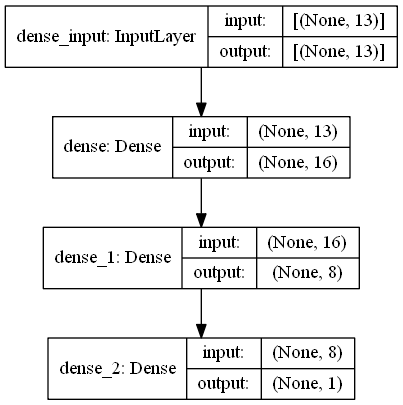

In [3]:
#===========================================================


"""顺序模型：类似于搭积木一样一层、一层放上去"""
# 用Sequential建立模型
model = tf.keras.Sequential()


"""添加层:其实就是 wx+b"""
# model.add(tf.keras.layers.Dense(1,input_shape = (13,)))    #输出是1维数据，输入是13维数据


# input資料
model.add(tf.keras.layers.Dense(16,input_shape = (13,)))
# 用relu來收斂
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1))



"""查看网络结构"""
model.summary()

# 顯示模型
tf.keras.utils.plot_model(model,show_shapes=True)

In [4]:
#===========================================================

import pandas as pd
"""编译，配置"""
# model每層定義好後需要經過compile
# optimizer最佳化工具為adam
# 方法為keras.losses.mean_squared_error
model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics=['mae','mse']
)

"""训练数据"""
# History.history 属性是一个记录了连续迭代的训练/验证（如果存在）损失值和评估值的字典
# verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
# validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数、精确度等。注意，validation_split的划分在shuffle之前，因此如果你的数据本身是有序的，需要先手工打乱再指定validation_split，否则可能会出现验证集样本不均匀。
# validation_data：形式为（X，y）的tuple，是指定的验证集。此参数将覆盖validation_spilt

history = model.fit(x_data, y_data,validation_split=0.25,batch_size=16,epochs = 70)

Epoch 1/70
19/19 [==============================] - 2s 68ms/step - loss: 528.8618 - mae: 21.4228 - mse: 528.8618 - val_loss: 666.2674 - val_mae: 23.7368 - val_mse: 666.2674
Epoch 2/70
19/19 [==============================] - 0s 7ms/step - loss: 491.5100 - mae: 20.4867 - mse: 491.5100 - val_loss: 644.0617 - val_mae: 23.2714 - val_mse: 644.0617
Epoch 3/70
19/19 [==============================] - 0s 4ms/step - loss: 531.8125 - mae: 21.0888 - mse: 531.8125 - val_loss: 622.3381 - val_mae: 22.7908 - val_mse: 622.3381
Epoch 4/70
19/19 [==============================] - 0s 4ms/step - loss: 483.6073 - mae: 20.0544 - mse: 483.6073 - val_loss: 597.6723 - val_mae: 22.2236 - val_mse: 597.6723
Epoch 5/70
19/19 [==============================] - 0s 4ms/step - loss: 475.6906 - mae: 19.7505 - mse: 475.6906 - val_loss: 567.6984 - val_mae: 21.5074 - val_mse: 567.6984
Epoch 6/70
19/19 [==============================] - 0s 4ms/step - loss: 436.7863 - mae: 18.6944 - mse: 436.7863 - val_loss: 529.8420 - val_

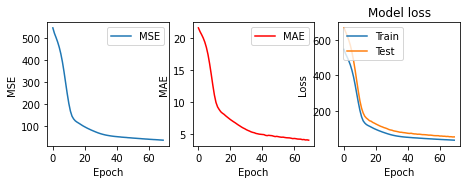

In [5]:
#===========================================================
#設定epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch



"""畫出各種圖"""
import matplotlib.pyplot as plt

"""畫出mse,mae"""
def plot_history(hist):
    
    plt.figure(figsize=(10,5))
    plt.subplot(2, 4, 1)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(hist['epoch'], hist['mse'],
           label='MSE')
    plt.legend()
    
    plt.subplot(2, 4, 2)
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mae'],
           label = 'MAE',color ='red')
    plt.legend()
    
plot_history(hist)



"""畫出Train,Test"""
# 绘制训练 & 验证的损失值
plt.subplot(2, 4, 3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

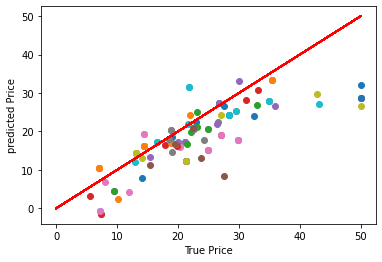

In [6]:
#======================================
"""實際與預測"""
indices = np.random.choice(len(x_test), size=100) 
# house_data.loc[indices,:]
count = 0
for n in indices:
    count += 1
    x_t = x_test[n]
    #用reshape()把數組轉成np樣式
    x_t_1 = x_t.reshape(1,13)
    predict = model.predict(x_t_1)
    
    target = y_test[n]
    plt.scatter(target,predict)
    plt.plot([0,50],[0,50],'r')
    plt.xlabel('True Price')
    plt.ylabel('predicted Price')
plt.show()  

In [7]:
#===========================================================



"""查看训练效果，从中随机提取20个数据下标"""
indices = np.random.choice(len(x_test), size=20) 
# house_data.loc[indices,:]
count = 0
for n in indices:
    count += 1
    x_t = x_test[n]
    x_t_1 = x_t.reshape(1,13)
    predict = model.predict(x_t_1)
    print("——第%d个数据——"% count)
    print("预测值：%f" % predict)
    target = y_data[n]
    print("标签值：%f" % target)
    print('\n')

——第1个数据——
预测值：25.214331
标签值：13.400000


——第2个数据——
预测值：31.975992
标签值：28.700000


——第3个数据——
预测值：21.370985
标签值：8.800000


——第4个数据——
预测值：14.608129
标签值：12.100000


——第5个数据——
预测值：-1.461870
标签值：25.000000


——第6个数据——
预测值：24.227957
标签值：18.400000


——第7个数据——
预测值：25.048328
标签值：10.500000


——第8个数据——
预测值：11.224837
标签值：13.900000


——第9个数据——
预测值：16.984793
标签值：20.400000


——第10个数据——
预测值：8.327551
标签值：14.600000


——第11个数据——
预测值：13.275947
标签值：22.000000


——第12个数据——
预测值：17.856562
标签值：20.300000


——第13个数据——
预测值：25.214331
标签值：13.400000


——第14个数据——
预测值：26.541971
标签值：22.900000


——第15个数据——
预测值：28.452917
标签值：14.300000


——第16个数据——
预测值：28.452917
标签值：14.300000


——第17个数据——
预测值：9.025359
标签值：15.700000


——第18个数据——
预测值：20.341696
标签值：16.500000


——第19个数据——
预测值：19.212225
标签值：20.700000


——第20个数据——
预测值：22.557112
标签值：15.600000


